In [17]:
# let's set up our environment

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [18]:
# import the mnist dataset
from sklearn.datasets import fetch_mldata
mnist  = fetch_mldata('MNIST original', data_home='.')

Xtr = mnist['data']
Ytr = mnist['target']

In [19]:
# we are going to start easy

num_labels = 3

num_examples_per_label = 1000

num_pixels = 28*28

# innitialize a matrix to store our data
X = np.zeros((num_examples_per_label*num_labels, num_pixels))

for label in range(num_labels):
        num_pics_selected = 0
        pic_label = 0
        while num_pics_selected < num_examples_per_label:
            if Ytr[pic_label] == label:
                X[num_pics_selected + label*num_examples_per_label] = Xtr[pic_label]
                num_pics_selected +=1
            pic_label +=1
            
# print X.shape

# # Preprocess the CIFAR-10 data using this ...
# # Normalize the data: subtract the mean image
# mean_image = np.mean(X, axis = 0)
# X -= mean_image

# preprocessing the data so that it is only black and white
# have a look at np.place 
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        if X[i,j] > 0.0:
            X[i,j] = 255.0
        
# # let's have a look at the processed data!
# for pic in range(3):
#     print pic
#     plt.imshow(-1*X[pic].reshape(28,28), cmap = plt.get_cmap('gray'))
#     plt.show()

In [20]:
# for picture in range(num_examples_per_label*num_labels):
#     plt.imshow(X[picture].reshape(28,28), cmap = 'Greys_r')
#     plt.show()

In [21]:
### HYPERPARAMETERS #######
# Here wil set up the parameters for our neural network
N = 1000 # number of points per class
D = 28*28 #Dimensionality of each datapoint
K = 3 # Number of classes
reg = 0.001
num_examples = N*K
learning_rate = 0.0000001

##### GENERATE THE Y VECTOR ###
## Our data is ready:
# I have data in X, but I don't have y
one_array = np.ones(N, dtype='uint8')
y = np.hstack((one_array*0,one_array*1, one_array*2))

print X.shape
print y.shape

#### INITIALIZATION ######
# To train a neural network, the first step is to initialize the
# Weght matrix, which in this case will have shape
# K by D
W = 0.01 * np.random.randn(D,K)
# We also need to initialize the boas vector
b = np.zeros((1,K))

for iteration in range(10000):
    # as sanity chec, print the shapes for W and X, and make sure you can do
    # operations with them.
    # print W.shape, X.shape, b.shape

    ##### FORWARD PASS [1 LAYER] ####
    # let's carry out the forward pass through the softmax activation
    scores = np.dot(X, W) + b

    # print scores

    # we can pass our scores matrix through our activation function
    # in this case it will be softmax
    probs = np.exp(scores)/np.sum(np.exp(scores),axis = 1, keepdims = True)
    # print scores
    # print probs

    # compute the loss (this is also called the cross-entropy loss)
    correct_probs = probs[range(num_examples),y]
    # print range(num_examples)
    # print probs
    # print correct_probs
    correct_log_probs = -np.log(correct_probs)
    
    #### CALCULATE THE LOSS ####
    loss = np.sum(correct_log_probs)/num_examples + 0.5*reg*np.sum(W*W)
    if iteration % 1000 == 0:
        print 'the current loss, at iteration %d is: ' % iteration, loss 

    # WARNING: This might be tricky, math, but we'll explain it tomorrow
    dscores = probs
    dscores[range(num_examples),y] -= 1
    dscores = dscores / num_examples

    # backpropagate to W and b
    dW = np.dot(X.T, dscores)
    db = np.sum(dscores, axis = 0, keepdims = True)
    
    dW = dW + reg*W

    # This is where magic happens
    W = W - learning_rate * dW
    b = b - learning_rate * db


(3000, 784)
(3000,)
the current loss, at iteration 0 is:  33.2741518608
the current loss, at iteration 1000 is:  3.73627918373
the current loss, at iteration 2000 is:  2.37607574921
the current loss, at iteration 3000 is:  1.84305273123
the current loss, at iteration 4000 is:  1.55155560177
the current loss, at iteration 5000 is:  1.36384039517
the current loss, at iteration 6000 is:  1.22737930545
the current loss, at iteration 7000 is:  1.12173123232
the current loss, at iteration 8000 is:  1.03952439171
the current loss, at iteration 9000 is:  0.973933202299


In [22]:
# evaluate the performance of the current weight matrix:

scores = np.dot(X,W) + b

# compute the class probabilities
probs = np.exp(scores) / np.sum(np.exp(scores),axis = 1, keepdims = True)

prediction = np.argmax(probs, axis = 1)
accuracy = np.mean(prediction == y)
print 'training accuracy is ', accuracy

training accuracy is  0.931333333333


(784, 3)


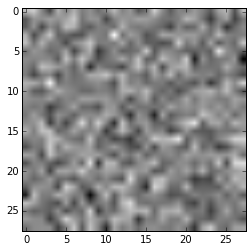

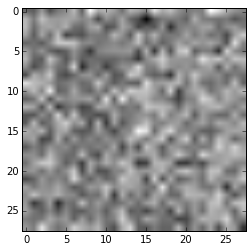

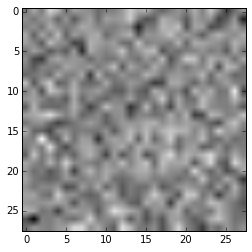

In [23]:
print W.shape

for i in range(K):
    plt.imshow(W.T[i].reshape(28,28),cmap = plt.get_cmap('gray'))
    plt.show()